In [64]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.

In [74]:
df = pd.read_csv('assignment2.csv')
df = df.sort_values(by='price', ascending=False) #sort the data set to see the biggest channels first
df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
2061,2061,Valeriusplein 40 I,205,3,1075 BJ,12-2-2016,999999,apartment,5,11-4-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
4582,4582,Eerste Passeerdersdwarsstraat 98,175,3,1016 XD,11-2-2016,999500,apartment,5,22-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1945
6236,6236,Apollolaan 67 III-IV,193,5,1077 AH,3-12-2015,999000,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
6350,6350,Lomanstraat 33 HS,182,3,1075 PT,17-9-2015,999000,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
498,498,Buiksloterdijk 236,253,5,1025 WE,9-3-2016,999000,house,8,19-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1985
4339,4339,Raphaëlstraat 24,158,4,1077 PV,30-1-2016,998000,apartment,6,18-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1932
3248,3248,Langestraat 46,178,3,1015 AL,10-11-2015,998000,house,6,26-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906
7449,7449,Prinsengracht 491 I,157,2,1016 HR,19-9-2015,995000,apartment,3,5-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
7899,7899,Minervalaan 19 -2,202,4,1077 NK,26-8-2015,995000,apartment,6,16-9-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1926
9495,9495,Oosteinde 21 Hs,148,3,1017 WT,27-3-2015,995000,apartment,5,26-8-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


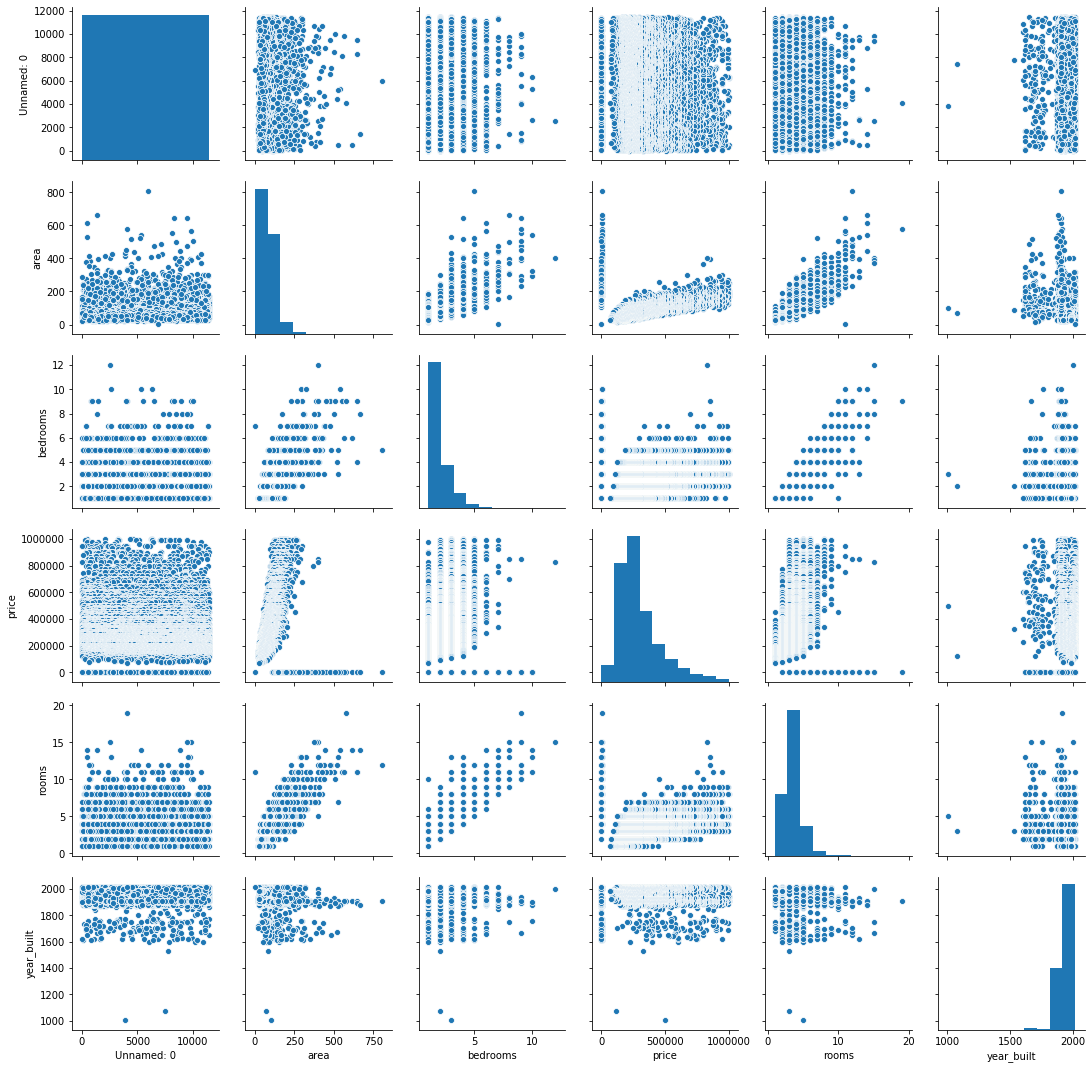

In [75]:
sns.pairplot(df)
plt.show()

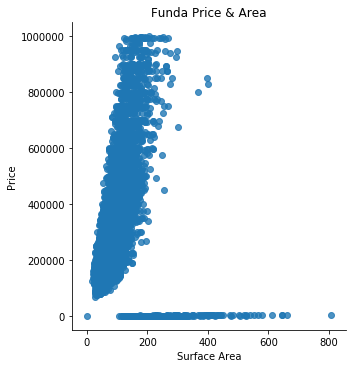

In [76]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.title('Funda Price & Area')
plt.show()

In [77]:
def under_5000(x):
    if(x < 5000):
        return float('NaN')
    else:
        return x

df['price'] = df['price'].apply(under_5000)
df = df.dropna()


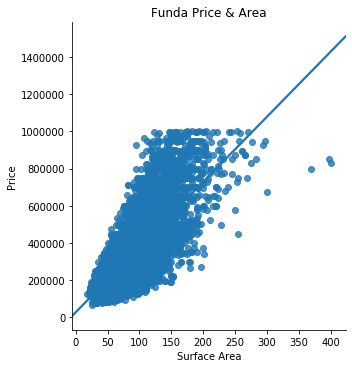

In [78]:
sns.lmplot(x='area', y='price', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.title('Funda Price & Area')
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


In [80]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
2061,2061,Valeriusplein 40 I,205,3,1075 BJ,12-2-2016,999999.0,apartment,5,11-4-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,745240.873683
4582,4582,Eerste Passeerdersdwarsstraat 98,175,3,1016 XD,11-2-2016,999500.0,apartment,5,22-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1945,640276.442881
6236,6236,Apollolaan 67 III-IV,193,5,1077 AH,3-12-2015,999000.0,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,703255.101362
6350,6350,Lomanstraat 33 HS,182,3,1075 PT,17-9-2015,999000.0,apartment,6,11-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,664768.143402
498,498,Buiksloterdijk 236,253,5,1025 WE,9-3-2016,999000.0,house,8,19-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1985,913183.962967
4339,4339,Raphaëlstraat 24,158,4,1077 PV,30-1-2016,998000.0,apartment,6,18-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1932,580796.598760
3248,3248,Langestraat 46,178,3,1015 AL,10-11-2015,998000.0,house,6,26-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906,650772.885961
7449,7449,Prinsengracht 491 I,157,2,1016 HR,19-9-2015,995000.0,apartment,3,5-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,577297.784400
7899,7899,Minervalaan 19 -2,202,4,1077 NK,26-8-2015,995000.0,apartment,6,16-9-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1926,734744.430603
9495,9495,Oosteinde 21 Hs,148,3,1017 WT,27-3-2015,995000.0,apartment,5,26-8-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,545808.455159
